
ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =

    10


ans =



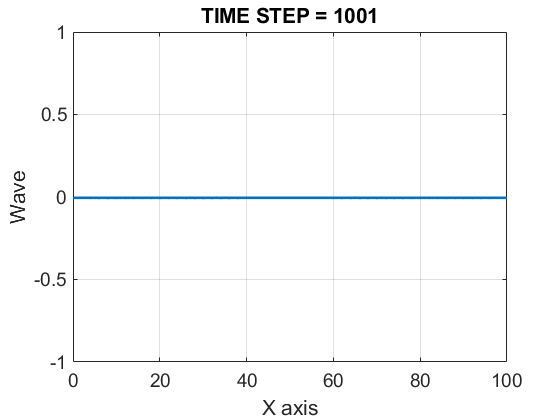

In [1]:
clear;
clc;

% Initialization

Nx = 101;  % X-Grids
dx = 1;    % Space-Step
x(:,1) = (0:Nx-1)*dx;
                
T = 1001;   % T-Grids
dt = 0.001; % Time-Step
t(:,1) = (0:T-1)*dt;

f = 20;   %Frequency
l = 40;   %Wave Lenth
c = l*f;  %Wave Speed
%c([1:Nx]) = c;              %Variable Velocity Model
%c([1:25 76,end]) = 0.5*f*l; %Variable Velocity Model
C = c.^2*dt^2/dx^2;

P = zeros(T,Nx);  % Pressure Matrix
S = zeros(T,Nx);  % Sourse Matrix
S(:,(Nx+1)/2) = 20000*(1-2*pi^2*max(f)^2.*(t-0).^2).*exp(-pi^2*max(f)^2.*(t-0).^2);  % Source Function

%-------------------------------------------------------------------------------------------------------------------------------%

% Conditions

P(1,:) = 0;   %Ghost Points
P(2,:) = 0;   %Initial Conditions
%P(:,1) = 0;   %Boundary Conditions
%P(:,end) = 0; %Boundary Conditions

%-------------------------------------------------------------------------------------------------------------------------------%

% Finite Difference Scheme

for j = 2:T-1
      for i = 2:Nx-1
        P(j+1,i) = C*(P(j,i+1)-2*P(j,i)+P(j,i-1))+2*P(j,i)-P(j-1,i)+dt^2*S(j,i);  
        %P(j+1,i) = C(i)*(P(j,i+1)-2*P(j,i)+P(j,i-1))+2*P(j,i)-P(j-1,i)+dt^2*S(j,i);
        P(j+1,1) = P(j,2)+((max(C)-1)/(max(C)+1))*(P(j+1,2)-P(j,1));             %Absorbing Boundary Condition
        P(j+1,end) = P(j,end-1)+((max(C)-1)/(max(C)+1))*(P(j+1,end-1)-P(j,end)); %Absorbing Boundary Condition
      end
end

%-------------------------------------------------------------------------------------------------------------------------------%

% Movie for the travelling wave

%v = VideoWriter('Video_5.avi');
%open(v);

for j = 1:T              
  plot(x,P(j,:),'linewidth',2);
  grid on;
  axis([min(x) max(x) -1 1]);
  xlabel('X axis','fontSize',14);
  ylabel('Wave','fontSize',14);              
  titlestring = ['TIME STEP = ',num2str(j)];
  title(titlestring ,'fontsize',14);                            
  h=gca; 
  get(h,'FontSize') 
  set(h,'FontSize',14);
  fh = figure(1);
  set(fh, 'color', 'white'); 
  F=getframe;
  %writeVideo(v,F);
            
end

%close(v);